In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
# Importing the Dataset

dataset=pd.read_csv(r"C:\Users\Sarthak Arora\Analytics Vidhya\BOOTCAMP CLASSES\NYC Trip Data Duration\nyc_taxi_trip_duration.csv")
dataset.drop(columns=["Unnamed: 11","Unnamed: 12"],inplace=True)
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 9:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 6:42,17-02-2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
dataset.vendor_id=dataset["vendor_id"].astype("category")
dataset.store_and_fwd_flag=dataset["store_and_fwd_flag"].astype("category")
dataset.pickup_datetime = pd.to_datetime(dataset.pickup_datetime, format="%d-%m-%Y %H:%M")
dataset.dropoff_datetime = pd.to_datetime(dataset.dropoff_datetime, format="%d-%m-%Y %H:%M")

dataset["distance"]=111139*abs(dataset.pickup_longitude-dataset.dropoff_longitude)+abs(dataset.pickup_latitude-dataset.dropoff_latitude)
dataset["avg_speed"]=dataset["distance"]*60*60/(1000*dataset["trip_duration"])

dataset['pickup_day_name'] = dataset['pickup_datetime'].dt.day_name()
dataset['dropoff_day_name']= dataset['dropoff_datetime'].dt.day_name()

dataset['pickup_time'] = dataset['pickup_datetime'].dt.hour
dataset['dropoff_time'] = dataset['dropoff_datetime'].dt.hour

cut_bins = [0,5,10,15,20,24]
names = ['Early Morning','Office Hours','Noon Hours','Evening','Night']

dataset['Pick_time_frame'] = pd.cut(dataset['pickup_time'],bins=cut_bins,labels=names)
dataset['Drop_time_frame'] = pd.cut(dataset['dropoff_time'],bins=cut_bins,labels=names)

dataset.pickup_day_name=dataset["pickup_day_name"].astype("category")
dataset.dropoff_day_name=dataset["dropoff_day_name"].astype("category")

dataset.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
distance                     float64
avg_speed                    float64
pickup_day_name             category
dropoff_day_name            category
pickup_time                    int64
dropoff_time                   int64
Pick_time_frame             category
Drop_time_frame             category
dtype: object

# Bi-Variate Analysis

In [4]:
vendor_biv=dataset.groupby('vendor_id')['trip_duration','distance','avg_speed',].mean()
vendor_biv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,trip_duration,distance,avg_speed
vendor_id,,,
1,837.096021,2668.309508,10.586744
2,1052.136219,2744.017740,10.667191


## Vendor_ID and trip_duration

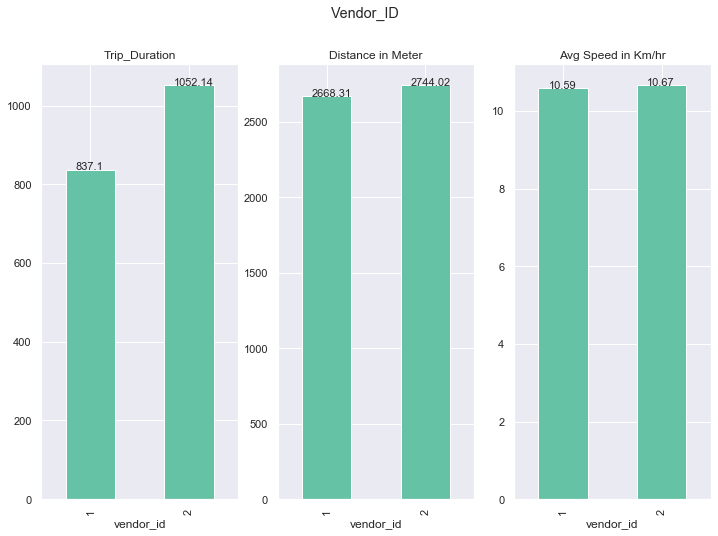

In [14]:
sns.set(palette="Set2")

figure,axes=plt.subplots(nrows=1,ncols=3,figsize=(12,8))


plt.suptitle("Vendor_ID")

axes[0].set_title("Trip_Duration")
axes[1].set_title("Distance in Meter")
axes[2].set_title("Avg Speed in Km/hr")

vendor_biv.iloc[:,0].plot(kind="bar",ax=axes[0])
vendor_biv.iloc[:,1].plot(kind="bar",ax=axes[1])
vendor_biv.iloc[:,2].plot(kind="bar",ax=axes[2])

# create a list to collect the plt.patches data
for ax in axes:
    for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.1, i.get_height(), \
                str(round((i.get_height()), 2)), fontsize=11)



1. sample size>30 and we know the population variance (Normal Test)
2. sample size>30 and we do not know the population variance (t-test)
3. sample size<30 and we know the population variance 
4. sample size<30 and we do not know the population variance (t-test)

### Vendor 2 has average time much more than Vendor 1

In [6]:
def onetailed_Ztest(x1,x2,s1,s2,n1,n2,diff):
    
    from scipy.stats import norm
    
    sig=((s1**2/n1)+(s2**2/n2))**0.5
    stat=(x1-x2-diff)/sig
    
    pval=1-norm.cdf(stat)
    return pval

In [7]:
def onetailed_Ttest(x1,x2,s1,s2,n1,n2,diff):
    
    from scipy.stats import t
    
    sig=((s1**2/n1)+(s2**2/n2))**0.5
    stat=(x1-x2-diff)/sig
    
    pval=1-t.cdf(stat,n1+n2-2)
    
    return pval

In [8]:
def twotailed_Ttest(x1,x2,s1,s2,n1,n2):
    
    from scipy.stats import t
    
    sig=((s1**2/n1)+(s2**2/n2))**0.5
    stat=(x1-x2)/sig
    
    pval=2*(1-t.cdf(abs(stat),n1+n2-2))
    
    return pval

In [9]:
def twotailed_Ztest(x1,x2,s1,s2,n1,n2):
    
    from scipy.stats import norm
    
    sig=((s1**2/n1)+(s2**2/n2))**0.5
    stat=(x1-x2)/sig
    
    pval=2*(1-norm.cdf(abs(stat)))
    
    return pval

In [10]:
vendor_bivall=dataset.groupby('vendor_id')[['trip_duration','distance','avg_speed']].describe()
vendor_bivall

trip_duration                                                       \
                  count         mean          std  min    25%    50%     75%   
vendor_id                                                                      
1              338841.0   837.096021  3396.706635  1.0  394.0  659.0  1068.0   
2              390481.0  1052.136219  4226.377832  1.0  399.0  666.0  1083.0   

                      distance               ...                              \
                 max     count         mean  ...          75%            max   
vendor_id                                    ...                               
1          1939736.0  338841.0  2668.309508  ...  2658.268333  660978.356561   
2            86391.0  390481.0  2744.017740  ...  2703.195186  147363.244679   

          avg_speed                                                            \
              count       mean        std  min       25%       50%        75%   
vendor_id                                                                       
1          338841.0  10.586744  11.738329  0.0  4.808456  9.021424  14.023499   
2          390481.0  10.667191   9.732638  0.0  4.798245  9.060421  14.143761   

                        
                   max  
vendor_id               
1          4194.190315  
2          1661.835516  

[2 rows x 24 columns]

In [11]:
n1=vendor_bivall.iloc[1,0]
n2=vendor_bivall.iloc[0,0]
m1=vendor_bivall.iloc[1,1]
m2=vendor_bivall.iloc[0,1]
s1=vendor_bivall.iloc[1,2]
s2=vendor_bivall.iloc[0,2]

print(onetailed_Ztest(m1,m2,s1,s2,n1,n2,200))
print(onetailed_Ttest(m1,m2,s1,s2,n1,n2,200))

0.046118957197495036
0.04611917117335107


As p-value is less than 0.5, we reject the Null Hypothesis
<br>Diff is greater than 200 for Trip_Duration betweeen Vendor 2 and 1

In [12]:
n1=vendor_bivall.iloc[1,8]
n2=vendor_bivall.iloc[0,8]
m1=vendor_bivall.iloc[1,9]
m2=vendor_bivall.iloc[0,9]
s1=vendor_bivall.iloc[1,10]
s2=vendor_bivall.iloc[0,10]

print(onetailed_Ztest(m1,m2,s1,s2,n1,n2,55))
print(onetailed_Ttest(m1,m2,s1,s2,n1,n2,55))

0.021758359408008854
0.02175854202460714


As p-value is less than 0.5, we reject the Null Hypothesis
<br> Diff is greater than 55m for Distance Travelled betweeen Vendor 2 and 1 which isn't much

In [15]:
n1=vendor_bivall.iloc[1,16]
n2=vendor_bivall.iloc[0,16]
m1=vendor_bivall.iloc[1,17]
m2=vendor_bivall.iloc[0,17]
s1=vendor_bivall.iloc[1,18]
s2=vendor_bivall.iloc[0,18]

print(twotailed_Ztest(m1,m2,s1,s2,n1,n2))
print(twotailed_Ttest(m1,m2,s1,s2,n1,n2))
print(onetailed_Ztest(m1,m2,s1,s2,n1,n2,0.05))
print(onetailed_Ttest(m1,m2,s1,s2,n1,n2,0.05))


0.0015924958222797159
0.0015925606576501217
0.1160526825748367
0.1160528768639203


As p-value is less than 0.5, we reject the Null Hypothesis
<br> Vendor 2 has higher average speed than Vendor 1

## MEAN MODELS

In [58]:
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


from sklearn.utils import shuffle

In [44]:
lent=dataset.shape[0]
lent

729322

In [49]:
a=round(80*lent/100)
b=lent-a
print(a)
print(b)

583458
145864


In [46]:

list1=[]
for i in range(lent):
    if(i<a):
        list1.append(True)
    else:
        list1.append(False)

In [47]:
new_df=shuffle(dataset,random_state=50)
train=new_df[list1]
test=new_df[[not a for a in list1]]

In [50]:
print(len(test))
print(len(train))

145864
583458


## Simple Mean

In [56]:
train["simple_mean"]=train.trip_duration.mean()
test["simple_mean"]=train.trip_duration.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
train.simple_mean

329666    951.260864
27983     951.260864
103532    951.260864
671270    951.260864
143202    951.260864
             ...    
246000    951.260864
65359     951.260864
221985    951.260864
113988    951.260864
176570    951.260864
Name: simple_mean, Length: 583458, dtype: float64

In [69]:
print(f"RMSLE_Test {np.sqrt(msle(test.trip_duration,test.simple_mean))}")
print(f"RMSLE_Train {np.sqrt(msle(train.trip_duration,train.simple_mean))}")
print(f"RMSE_Train {np.sqrt(mse(train.trip_duration,train.simple_mean))}")
print(f"RMSE_Test {np.sqrt(mse(test.trip_duration,test.simple_mean))}")
print(f"MAE_Train {mae(train.trip_duration,train.simple_mean)}")
print(f"MAE_Test {mae(test.trip_duration,test.simple_mean)}")

RMSLE_Test 0.8844186281797533
RMSLE_Train 0.8864329597463309
RMSE_Train 3157.165508512641
RMSE_Test 5899.650196399025
MAE_Train 617.6793000934512
MAE_Test 621.2808564545121


## Vendor ID mean

In [72]:
v1=train[train.vendor_id==1]["trip_duration"].mean()
v1
v2=train[train.vendor_id==2]["trip_duration"].mean()
v2


1056.2088941576021

In [74]:
train["Vendor_ID_mean"]=list(map(lambda x: v1 if x==1 else v2, train["vendor_id"]))
train.Vendor_ID_mean

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


329666     830.543342
27983     1056.208894
103532     830.543342
671270    1056.208894
143202    1056.208894
             ...     
246000    1056.208894
65359     1056.208894
221985    1056.208894
113988     830.543342
176570    1056.208894
Name: Vendor_ID_mean, Length: 583458, dtype: float64

In [75]:
test["Vendor_ID_mean"]=list(map(lambda x: v1 if x==1 else v2, test["vendor_id"]))
test.Vendor_ID_mean

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


301963    1056.208894
389717    1056.208894
446842     830.543342
170480     830.543342
484886    1056.208894
             ...     
321502    1056.208894
441633    1056.208894
677997     830.543342
239499     830.543342
103904     830.543342
Name: Vendor_ID_mean, Length: 145864, dtype: float64

In [76]:
print(f"RMSLE_Test {np.sqrt(msle(test.trip_duration,test.Vendor_ID_mean))}")
print(f"RMSLE_Train {np.sqrt(msle(train.trip_duration,train.Vendor_ID_mean))}")
print(f"RMSE_Train {np.sqrt(mse(train.trip_duration,train.Vendor_ID_mean))}")
print(f"RMSE_Test {np.sqrt(mse(test.trip_duration,test.Vendor_ID_mean))}")
print(f"MAE_Train {mae(train.trip_duration,train.Vendor_ID_mean)}")
print(f"MAE_Test {mae(test.trip_duration,test.Vendor_ID_mean)}")

RMSLE_Test 0.8878438412695892
RMSLE_Train 0.8892407121627409
RMSE_Train 3155.158471769479
RMSE_Test 5899.082565192395
MAE_Train 623.630364108748
MAE_Test 627.8301353634984
